# Base Model HMM

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from hmmlearn import hmm

def calculate_Zscore(df, serie):
    this_df = deepcopy(df)
    return_series = this_df[serie].pct_change()
    return return_series.mean() / (return_series.std(ddof=1) / np.sqrt(return_series.shape))


* first we set the global variables.

In [2]:
# Hidden Markov Model Modifiable Parameters
hidden_states = 3;
em_iterations = 100;

* then we read the data and delete the unwanted data

In [3]:
df = pd.read_csv('data/SPY.csv')

df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

* Here is our remaining DF

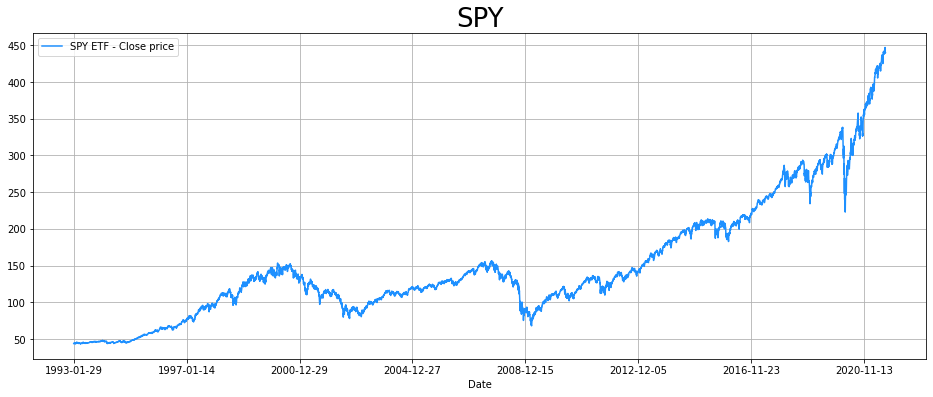

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
df.plot(x='Date', y='Close', color='dodgerblue', label='SPY ETF - Close price', ax=ax)
plt.title('SPY', fontsize=26)
plt.grid()
plt.legend();

In [5]:
df

,Date,Close
0,1993-01-29,43.937500
1,1993-02-01,44.250000
2,1993-02-02,44.343750
3,1993-02-03,44.812500
4,1993-02-04,45.000000
...,...,...
7187,2021-08-13,445.920013
7188,2021-08-16,446.970001
7189,2021-08-17,444.040009
7190,2021-08-18,439.179993


* Now let's set the MA and then Volatility for some number of days, and add the daily Return of the SPY in percentage

In [6]:
yearly_adjust = np.sqrt(252)
hist_periods = [10, 30, 60, 120]
for period in hist_periods:
    df[f'MA_{period}_days'] = pd.Series(np.log(df['Close'] / df['Close'].shift(1))).rolling(period).std() * yearly_adjust
    df[f'hist_vol_{period}_days'] = pd.Series(np.log(df['Close'] / df['Close'].shift(1))).rolling(period).std() * yearly_adjust
df['Return'] = df['Close'].pct_change() * 100
df

,Date,Close,MA_10_days,hist_vol_10_days,MA_30_days,hist_vol_30_days,MA_60_days,hist_vol_60_days,MA_120_days,hist_vol_120_days,Return
0,1993-01-29,43.937500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-02-01,44.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711238
2,1993-02-02,44.343750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211864
3,1993-02-03,44.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.057082
4,1993-02-04,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418410
...,...,...,...,...,...,...,...,...,...,...,...
7187,2021-08-13,445.920013,0.060217,0.060217,0.099337,0.099337,0.093842,0.093842,0.125438,0.125438,0.181984
7188,2021-08-16,446.970001,0.056429,0.056429,0.097529,0.097529,0.091833,0.091833,0.124633,0.124633,0.235466
7189,2021-08-17,444.040009,0.060805,0.060805,0.099675,0.099675,0.093130,0.093130,0.119485,0.119485,-0.655523
7190,2021-08-18,439.179993,0.080787,0.080787,0.105031,0.105031,0.094463,0.094463,0.120444,0.120444,-1.094500


In [7]:
df.fillna(0,inplace=True)

* This is our final DF with all moving average and the Return values

In [8]:
df

,Date,Close,MA_10_days,hist_vol_10_days,MA_30_days,hist_vol_30_days,MA_60_days,hist_vol_60_days,MA_120_days,hist_vol_120_days,Return
0,1993-01-29,43.937500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1993-02-01,44.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.711238
2,1993-02-02,44.343750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211864
3,1993-02-03,44.812500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057082
4,1993-02-04,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.418410
...,...,...,...,...,...,...,...,...,...,...,...
7187,2021-08-13,445.920013,0.060217,0.060217,0.099337,0.099337,0.093842,0.093842,0.125438,0.125438,0.181984
7188,2021-08-16,446.970001,0.056429,0.056429,0.097529,0.097529,0.091833,0.091833,0.124633,0.124633,0.235466
7189,2021-08-17,444.040009,0.060805,0.060805,0.099675,0.099675,0.093130,0.093130,0.119485,0.119485,-0.655523
7190,2021-08-18,439.179993,0.080787,0.080787,0.105031,0.105031,0.094463,0.094463,0.120444,0.120444,-1.094500


In [9]:
# now we mark the test train randomly

# first we set a global var for year training days
year = 252

# we will set the start data 10 years + all nulls from MA
start_train_idx = 121 + 10*year

# stop for 2 years prior to data ends
stop_train_idx = df.shape[0]- 2*year

# and end index for the ending
end_test_idx = df.shape[0]

* divide the data

In [10]:
train = pd.DataFrame(df, index = range(start_train_idx, stop_train_idx)).reset_index(drop=True)
test = pd.DataFrame(df, index = range(stop_train_idx+1, end_test_idx)).reset_index(drop=True)

* see the shapes

In [11]:
train.shape, test.shape

((4047, 11), (503, 11))

* Create the model

In [12]:
model = hmm.GaussianHMM(n_components = hidden_states, covariance_type="full", n_iter = em_iterations, random_state=26);

* we will set the Data to be Fitted on the Historical 10 days Volatility and the return.

In [13]:
obs = list(zip(train["hist_vol_10_days"], train["Return"]))

* Fitting the model and obtaining predictions

In [14]:
model.fit(obs)
predictions = model.predict(obs)

* now we see the predictions

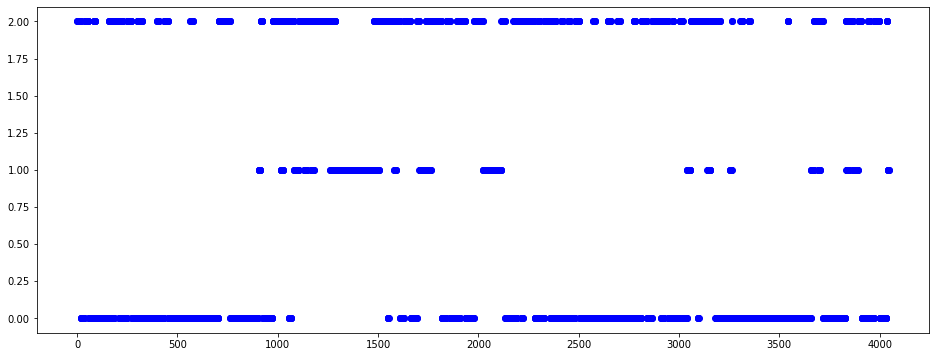

In [30]:
plt.figure(figsize=(16, 6))
plt.plot(predictions, 'bo');

* and lets plot the state with regards to the closing 

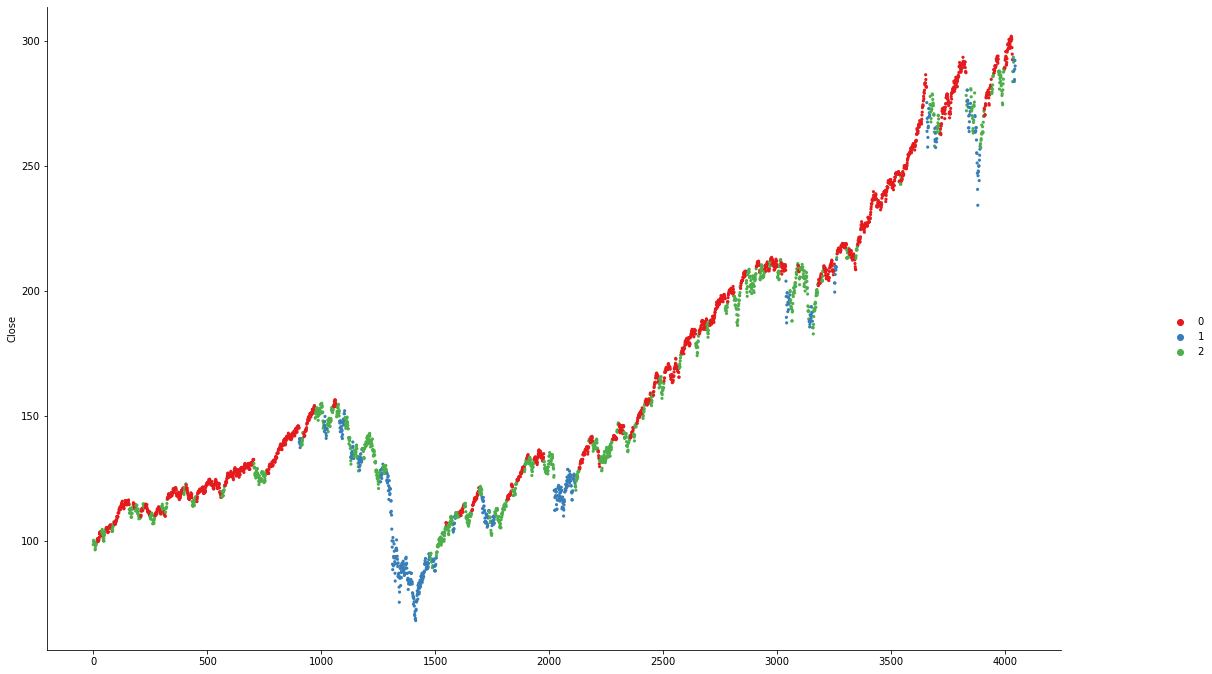

In [35]:
plot = sns.relplot(x=range(0,train.shape[0]), y="Close", data=train, hue=predictions, linewidth = 0, palette="Set1", s = 10);
plot.fig.set_size_inches(18,10)

In [17]:
print("Model Score: {0}".format(model.score(obs)));

Model Score: 2685.7842698768577


In [18]:
res_train = deepcopy(train)
res_train['prediction'] = predictions
res_total = res_train[['Return', 'hist_vol_10_days', 'prediction']].groupby('prediction').mean().reset_index()
res_total

,prediction,Return,hist_vol_10_days
0,0,0.063921,0.082839
1,1,-0.040606,0.346257
2,2,0.016069,0.159298


In [19]:
loser_state = res_total['Return'].argmin()
winner_state = res_total['Return'].argmax()
loser_state

1

* we can see 1 is the "loser state" (it changes for each iteration...) we will choose the other states 

In [20]:
first_trading = train['Close'].iloc[0]
trading = [first_trading]
for day, (daily_return, prediction) in enumerate(zip(train['Return'][1:], predictions[1:]), start=1):
    trading.append(trading[-1] * (1 + (daily_return / 100 * (prediction != loser_state))))
train['trading_sim'] = trading
train

,Date,Close,MA_10_days,hist_vol_10_days,MA_30_days,hist_vol_30_days,MA_60_days,hist_vol_60_days,MA_120_days,hist_vol_120_days,Return,trading_sim
0,2003-07-24,98.489998,0.144743,0.144743,0.162325,0.162325,0.155028,0.155028,0.187889,0.187889,-0.755744,98.489998
1,2003-07-25,100.230003,0.165046,0.165046,0.170363,0.170363,0.158456,0.158456,0.189382,0.189382,1.766682,100.230003
2,2003-07-28,99.860001,0.163544,0.163544,0.167892,0.167892,0.158777,0.158777,0.188820,0.188820,-0.369153,99.860001
3,2003-07-29,99.400002,0.164545,0.164545,0.156343,0.156343,0.156979,0.156979,0.188698,0.188698,-0.460644,99.400002
4,2003-07-30,99.160004,0.162636,0.162636,0.156399,0.156399,0.157021,0.157021,0.188571,0.188571,-0.241447,99.160004
...,...,...,...,...,...,...,...,...,...,...,...,...
4042,2019-08-14,283.899994,0.277827,0.277827,0.172750,0.172750,0.149935,0.149935,0.131500,0.131500,-2.956758,426.407450
4043,2019-08-15,284.649994,0.279009,0.279009,0.170911,0.170911,0.148873,0.148873,0.131538,0.131538,0.264178,426.407450
4044,2019-08-16,288.850006,0.291971,0.291971,0.177300,0.177300,0.151767,0.151767,0.133197,0.133197,1.475500,426.407450
4045,2019-08-19,292.329987,0.247353,0.247353,0.180722,0.180722,0.151392,0.151392,0.134266,0.134266,1.204771,426.407450


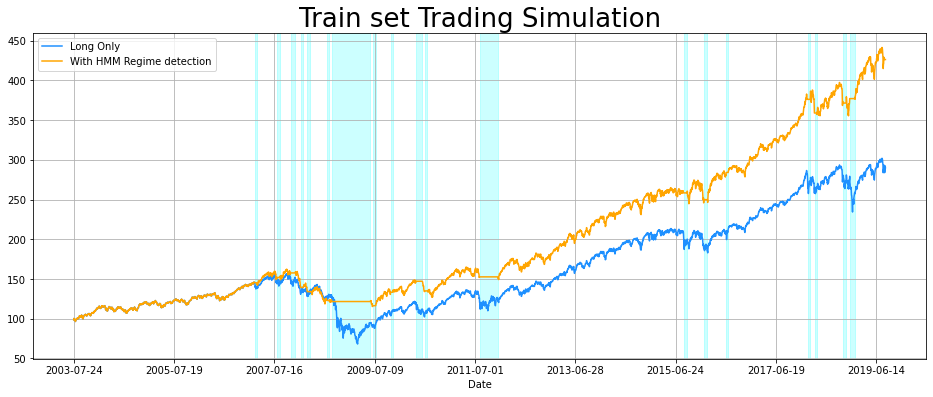

In [109]:
predictions_start = np.where((predictions == 1).astype(int) * (np.pad(np.diff(predictions), (1, 0)) != 0).astype(int))[0]
predictions_end   = np.where((predictions == 1).astype(int) * (np.pad(np.diff(predictions), (0, 1)) != 0).astype(int))[0]

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
train.plot(x='Date', y='Close', color='dodgerblue', label='Long Only', ax=ax)
train.plot(x='Date', y='trading_sim', color='orange', label='With HMM Regime detection', ax=ax)
for st, end in zip(predictions_start, predictions_end):
    ax.axvspan(st, end, alpha=0.2, color='cyan')
plt.title('Train set Trading Simulation', fontsize=26)
plt.grid()
plt.legend();

In [110]:
print('For the buy and hold trading strategy => Overall return = %0.2f%%  ~  Z-score = %0.3f' 
      % (100 * (train['Close'].iloc[-1] / train['Close'].iloc[0] - 1), calculate_Zscore(train, 'Close')))
print('For the HMM based    trading strategy => Overall return = %0.2f%%  ~  Z-score = %0.3f' 
      % (100 * (train['trading_sim'].iloc[-1] / train['trading_sim'].iloc[0] - 1), calculate_Zscore(train, 'trading_sim')))

For the buy and hold trading strategy => Overall return = 194.54%  ~  Z-score = 1.859
For the HMM based    trading strategy => Overall return = 332.94%  ~  Z-score = 3.481


We see that our model managed to detect some periods of bear market, and overall it has a significantly better return than the Long-Only model!<br>
It has also a Z-score almost twice as good, which means it seems valuable!

# Now let's test the model on the test data !

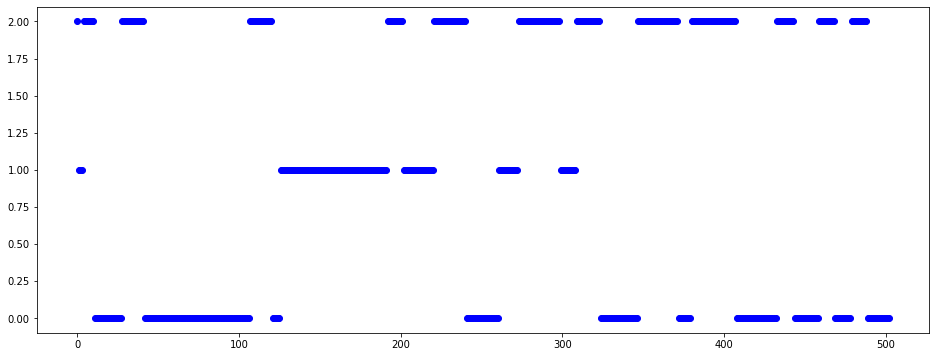

In [31]:
obs_test = list(zip(test["hist_vol_10_days"], test["Return"]))
predictions_test = model.predict(obs_test)
plt.figure(figsize=(16, 6))
plt.plot(predictions_test, 'bo');

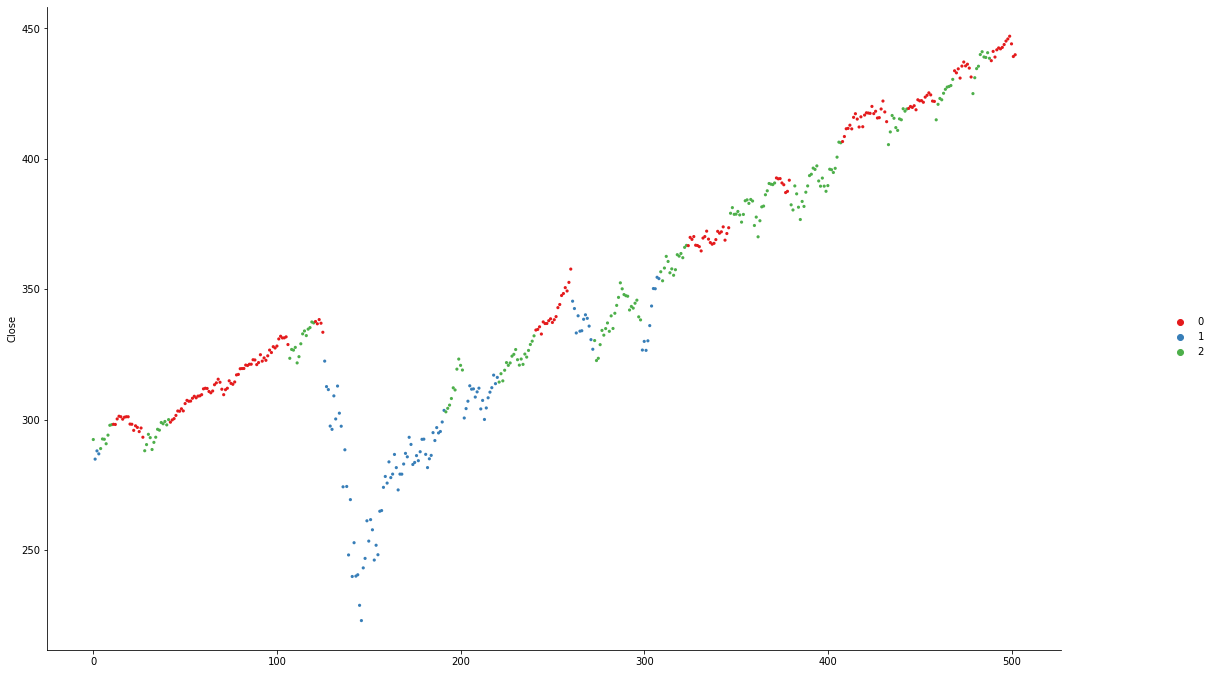

In [36]:
plot = sns.relplot(x=range(0,test.shape[0]), y="Close", data=test, hue=predictions_test, linewidth = 0, palette="Set1", s = 10);
plot.fig.set_size_inches(18,10)


In [25]:
print("Model Score: {0}".format(model.score(obs)));

Model Score: 2685.7842698768577


In [26]:
first_trading_test = test['Close'].iloc[0]
trading_test = [first_trading_test]
for day, (daily_return, prediction) in enumerate(zip(test['Return'][1:], predictions_test[1:]), start=1):
    trading_test.append(trading_test[-1] * (1 + (daily_return / 100 * (prediction != loser_state))))
test['trading_sim_test'] = trading_test
test

,Date,Close,MA_10_days,hist_vol_10_days,MA_30_days,hist_vol_30_days,MA_60_days,hist_vol_60_days,MA_120_days,hist_vol_120_days,Return,trading_sim_test
0,2019-08-22,292.359985,0.225971,0.225971,0.182743,0.182743,0.150932,0.150932,0.134816,0.134816,-0.030784,292.359985
1,2019-08-23,284.850006,0.259275,0.259275,0.196015,0.196015,0.160575,0.160575,0.140122,0.140122,-2.568744,292.359985
2,2019-08-26,288.000000,0.260680,0.260680,0.199431,0.199431,0.159373,0.159373,0.140693,0.140693,1.105843,292.359985
3,2019-08-27,286.869995,0.246257,0.246257,0.199495,0.199495,0.159521,0.159521,0.140255,0.140255,-0.392363,292.359985
4,2019-08-28,288.890015,0.192419,0.192419,0.200297,0.200297,0.154152,0.154152,0.140543,0.140543,0.704159,294.418663
...,...,...,...,...,...,...,...,...,...,...,...,...
498,2021-08-13,445.920013,0.060217,0.060217,0.099337,0.099337,0.093842,0.093842,0.125438,0.125438,0.181984,526.468320
499,2021-08-16,446.970001,0.056429,0.056429,0.097529,0.097529,0.091833,0.091833,0.124633,0.124633,0.235466,527.707971
500,2021-08-17,444.040009,0.060805,0.060805,0.099675,0.099675,0.093130,0.093130,0.119485,0.119485,-0.655523,524.248723
501,2021-08-18,439.179993,0.080787,0.080787,0.105031,0.105031,0.094463,0.094463,0.120444,0.120444,-1.094500,518.510823


* we can see a great outcome for about 30 $

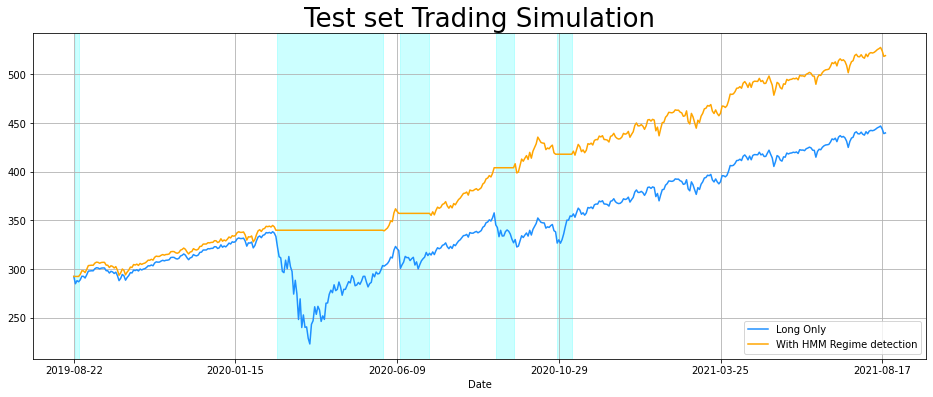

In [108]:
predictions_test_start = np.where((predictions_test == 1).astype(int) * (np.pad(np.diff(predictions_test), (1, 0)) != 0).astype(int))[0]
predictions_test_end   = np.where((predictions_test == 1).astype(int) * (np.pad(np.diff(predictions_test), (0, 1)) != 0).astype(int))[0]

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
test.plot(x='Date', y='Close', color='dodgerblue', label='Long Only', ax=ax)
test.plot(x='Date', y='trading_sim_test', color='orange', label='With HMM Regime detection', ax=ax)
for st, end in zip(predictions_test_start, predictions_test_end):
    ax.axvspan(st, end, alpha=0.2, color='cyan')
plt.title('Test set Trading Simulation', fontsize=26)
plt.grid()
plt.legend();

In [29]:
print('For the buy and hold trading strategy => Overall return = %0.2f%%  ~  Z-score = %0.3f' 
      % (100 * (test['Close'].iloc[-1] / test['Close'].iloc[0] - 1), calculate_Zscore(test, 'Close')))
print('For the HMM based    trading strategy => Overall return = %0.2f%%  ~  Z-score = %0.3f' 
      % (100 * (test['trading_sim_test'].iloc[-1] / test['trading_sim_test'].iloc[0] - 1), calculate_Zscore(test, 'trading_sim_test')))

For the buy and hold trading strategy => Overall return = 50.45%  ~  Z-score = 1.328
For the HMM based    trading strategy => Overall return = 77.63%  ~  Z-score = 3.838
